In [20]:
import numpy as np
import bisect

from matplotlib import pyplot as plt

### Reading Slice

In [21]:
binary = np.fromfile('../cube/map.bin')
binary.shape

(87464,)

In [22]:
cube_shape = (26, 29, 116)

In [23]:
cube = binary.reshape(cube_shape)
cube.shape

(26, 29, 116)

In [24]:
aslice = cube[:,:,60]
aslice.shape

(26, 29)

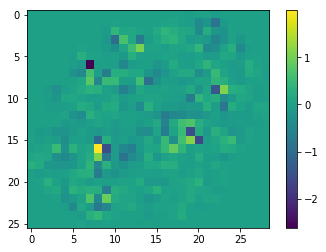

In [6]:
plt.imshow(aslice)
plt.colorbar()
plt.show()

In [25]:
bslice = (aslice == 0) * 1
bslice.shape

(26, 29)

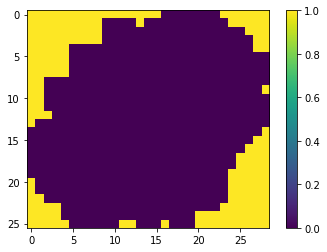

In [26]:
plt.imshow(bslice)
plt.colorbar()
plt.show()

### Generating Input File

In [27]:
data = aslice
data.shape

(26, 29)

In [30]:
print(len(data.shape))
for l in data.shape:
    print(l)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        print(int(data[i][j] * 1e7))

2
26
29
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
55284
46975
134063
-303849
174085
488335
-818476
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-183768
387899
10380
-92316
0
11511
-154774
610392
868103
44345
-522801
-3988795
-1653070
-8525719
-1075767
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-626754
4183664
1084878
1486835
463368
-19638
1965079
4059243
2578339
1302684
967446
-4218433
2352578
-1806639
-2549623
214599
-59545
0
0
0
0
0
0
0
0
0
0
0
0
-1537629
-9425664
6603578
1348562
-6965168
-644947
947355
2788594
3722230
1422093
-921889
-406748
-1081175
-5030175
-2871810
253747
-1656914
219175
0
0
0
0
0
0
0
-189936
462856
-207072
75297
-1097910
-3094668
844385
5397607
10682566
467028
568201
-385001
780006
406720
1276253
4171659
-4032748
-3247239
523649
2738474
-4228674
-418223
0
0
0
0
0
0
0
-226957
2868497
555721
318039
-291425
28842
-1055619
3002035
167465
-152065
62439
681454
344112
-480346
-383839
615456
-922948
-607345
1272306
872973
-1142851
-132353
190337
-39130
0
0
0
0
0
-319896
-1404330
-26146465
-356011
110650
-2659

### Reading Output File

In [15]:
birth = []
death = []
with open('slice_0.txt') as f:
    for line in f.readlines():
        pair = line.split()
        birth.append(int(pair[0]))
        death.append(int(pair[1]))

In [16]:
pd = tuf.persistence_diagram()
pd

[(Pixel: [coordinates: (16, 8); value: 0.0], 0.0, inf),
 (Pixel: [coordinates: (15, 19); value: 0.8525808886801793],
  0.8525808886801793,
  2.0124069233456408),
 (Pixel: [coordinates: (9, 23); value: 0.891496257900952],
  0.891496257900952,
  2.0316576571665554),
 (Pixel: [coordinates: (4, 13); value: 0.9276188166121235],
  0.9276188166121235,
  1.9552034736744643),
 (Pixel: [coordinates: (22, 9); value: 1.079405782757049],
  1.079405782757049,
  1.981651477115282),
 (Pixel: [coordinates: (16, 17); value: 1.1061673246141508],
  1.1061673246141508,
  1.5927595032106994),
 (Pixel: [coordinates: (8, 7); value: 1.1816818626314995],
  1.1816818626314995,
  2.013285108561395),
 (Pixel: [coordinates: (22, 7); value: 1.2623951706104275],
  1.2623951706104275,
  1.8656818711889367),
 (Pixel: [coordinates: (13, 19); value: 1.273710661662855],
  1.273710661662855,
  1.4768728047909756),
 (Pixel: [coordinates: (3, 11); value: 1.3355176474978445],
  1.3355176474978445,
  1.8610192130792989),
 (Pix

In [40]:
y = np.arange(1, len(pd))
xmin = [f[1] for f in pd]
xmax = [4 if np.isinf(f[2]) else f[2] for f in pd]

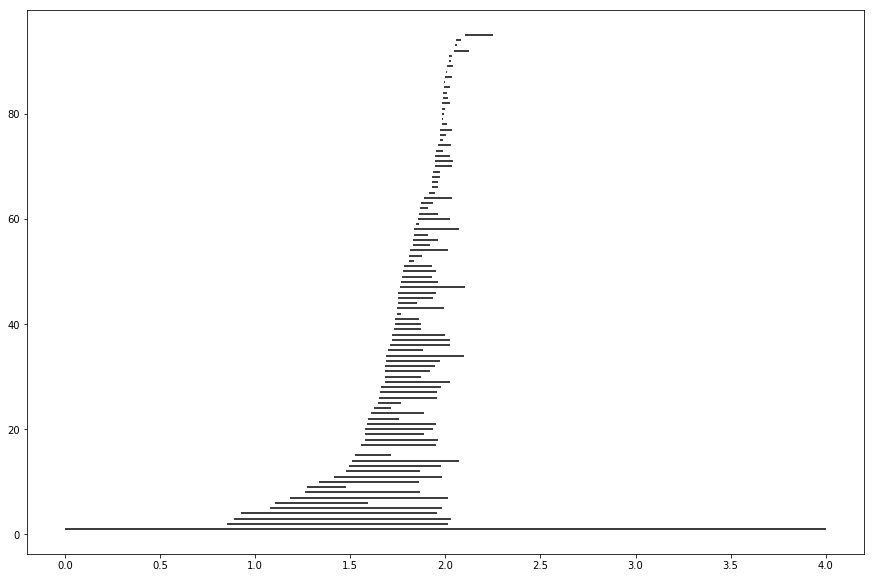

In [73]:
plt.figure(figsize=(15,10))
plt.hlines(y=y, xmin=xmin, xmax=xmax)
plt.show()

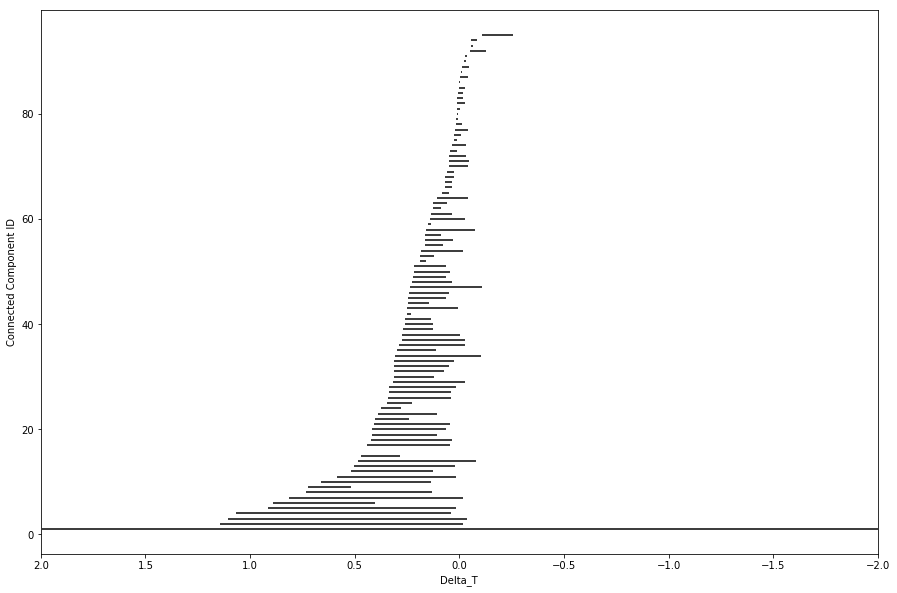

In [79]:
plt.figure(figsize=(15,10))
plt.hlines(y=y, xmin=[data.max() - x for x in xmin], xmax=[data.max() - x for x in xmax])
plt.xlim(2,-2)
plt.xlabel('Delta_T')
plt.ylabel('Connected Component ID')
plt.show()